# ~~How to answer the question: "Why is The Empire Strikes Back the best Star Wars film?"~~

# Cleaning the 2014 Star Wars Survey data from FiveThirtyEight

In this Jupyter notebook, we will clean a dataset for analysis using pandas.

## About the dataset

Some of the columns in the set are as follows:
* `RespondentID` — An anonymized ID for the respondent (person taking the survey)
* `Gender` — the respondent's gender
* `Age` — the respondent's age
* `Household Income` — the respondent's income
* `Education` — the respondent's education level
* `Location (Census Region)` — the respondent's location
* `Have you seen any of the 6 films in the Star Wars franchise?` — a Yes or No response
* `Do you consider yourself to be a fan of the Star Wars film franchise?` — a Yes or No response

There are other columns that are unnamed, and we'll explore what those columns represent. We will likely find some of our answers implied in the dataset itself, and more clearly in the [story that FiveThiryEight published using this dataset](https://fivethirtyeight.com/features/americas-favorite-star-wars-movies-and-least-favorite-characters/).

The dataset can be found on [FiveThirtyEight's Github](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey).

In [1]:
import numpy as np
import pandas as pd
star_wars = pd.read_csv('star_wars.csv', encoding='ISO-8859-1')

star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3292719380,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1.0,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
6,3292684787,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6.0,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
7,3292663732,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4.0,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
8,3292654043,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Somewhat favorably,Han,No,NaN,No,Male,18-29,"$0 - $24,999",Some college or Associate degree,South Atlantic
9,3292640424,Yes,No,NaN,Star Wars: Episode II Attack of the Clones,NaN,NaN,NaN,NaN,1.0,...,Very favorably,I don't understand this question,No,NaN,No,Male,18-29,"$25,000 - $49,999",Some college or Associate degree,Pacific

In [2]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

## Initial notes on the data

If a survey respondent answers "no" to the question `Have you seen any of the 6 films in the Star Wars franchise?`, then it fills in NaN for many more columns for that row. Maybe the reasoning is that, if they haven't seen the movies, that they can't comment on these other questions. There might be exceptions to this, so we might want to check if that is the case later.

There are some NaN results for the `Which of the following Star Wars films have you seen? Please select all that apply.` column, and there are unnamed columns that are near that seem to be asking the same question, the separation must have come from a checkbox method of answering the question. Luckily we can tell what the column is intended for by the data entry, for example, entries for the column `Unnamed: 4` are all either NaN or "Star Wars: Episode II Attack of the Clones", so we know that this column is for Star Wars Episode 2.

The `Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.` column is similarly broken into six columns, though now we have to assume that column 1 is for Starwars I, column 6 in this set is Starwars VI, and that the columns inetween are in the correct order. We'll want to find if there is a way to check this.

The `Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.` column is a bit trickier, with it being separated into 14 columns and the responses recorded in the data being along the lines of "Somewhat favorably", leaving us with no indication of which character the column refers to. We will definitely want to see if we can check which column is responsible for which character.

There are some NaN values in the `Do you consider yourself to be a fan of the Expanded Universe?` column that seem weird considering that there are also Yes and No answers. Perhaps NaN is to indicate a third option: I know nothing about the expanded universe.

# Booleans

There are certain columns with only two or three different answers in which it will be easier to work with the data if those entiries are instead True, False, or NaN. We'll use the `Series.value_counts()` to get a list of unique values of a particular column, and then we'll use the `Series.map()` function with a dictionary to change the entries in those columns into boolean values.

The first two columns we will perform this on are the `Have you seen any of the 6 films in the Star Wars franchise?` and the `Do you consider yourself to be a fan of the Star Wars film franchise?` columns

First, we'll rename them, because their names are very long.

In [3]:
star_wars.rename(columns={
    'Have you seen any of the 6 films in the Star Wars franchise?': 'star_wars_viewer',
    'Do you consider yourself to be a fan of the Star Wars film franchise?': 'star_wars_fan'
}, inplace=True)

star_wars.columns[:3]

Index(['RespondentID', 'star_wars_viewer', 'star_wars_fan'], dtype='object')

In [4]:
star_wars['star_wars_viewer'].value_counts()

Yes    936
No     250
Name: star_wars_viewer, dtype: int64

In [5]:
star_wars['star_wars_viewer'] = star_wars['star_wars_viewer'].map({'Yes': True, 'No': False})
star_wars['star_wars_viewer'].value_counts()

True     936
False    250
Name: star_wars_viewer, dtype: int64

In [6]:
star_wars['star_wars_fan'].value_counts()

Yes    552
No     284
Name: star_wars_fan, dtype: int64

In [7]:
star_wars['star_wars_fan'] = star_wars['star_wars_fan'].map({'Yes': True, 'No': False})
star_wars['star_wars_fan'].value_counts()

True     552
False    284
Name: star_wars_fan, dtype: int64

# Booleans (cont.)

Rinse and repeat for the next six columns; These columns are the result of a single question from the survey with six check-mark boxes—one for each of the first six Star Wars films. We'll continue to use the `Series.value_counts()` method to check before and after our work that we aren't running into anything tricky.

In [8]:
star_wars.rename(columns={
    'Which of the following Star Wars films have you seen? Please select all that apply.': 'seen_ep_1',
    'Unnamed: 4': 'seen_ep_2',
    'Unnamed: 5': 'seen_ep_3',
    'Unnamed: 6': 'seen_ep_4',
    'Unnamed: 7': 'seen_ep_5',
    'Unnamed: 8': 'seen_ep_6'
}, inplace=True)

star_wars.columns[3:9]

Index(['seen_ep_1', 'seen_ep_2', 'seen_ep_3', 'seen_ep_4', 'seen_ep_5',
       'seen_ep_6'],
      dtype='object')

In [9]:
for column in star_wars.columns[3:9]:
    print(star_wars[column].value_counts())

Star Wars: Episode I  The Phantom Menace    673
Name: seen_ep_1, dtype: int64
Star Wars: Episode II  Attack of the Clones    571
Name: seen_ep_2, dtype: int64
Star Wars: Episode III  Revenge of the Sith    550
Name: seen_ep_3, dtype: int64
Star Wars: Episode IV  A New Hope    607
Name: seen_ep_4, dtype: int64
Star Wars: Episode V The Empire Strikes Back    758
Name: seen_ep_5, dtype: int64
Star Wars: Episode VI Return of the Jedi    738
Name: seen_ep_6, dtype: int64


In [10]:
star_wars[star_wars.columns[3:9]] = (star_wars[star_wars.columns[3:9]]
    .replace({np.NaN: False})
    .replace(regex=r'.', value=True)
)

star_wars[star_wars.columns[3:9]]

,seen_ep_1,seen_ep_2,seen_ep_3,seen_ep_4,seen_ep_5,seen_ep_6
0,True,True,True,True,True,True
1,False,False,False,False,False,False
2,True,True,True,False,False,False
3,True,True,True,True,True,True
4,True,True,True,True,True,True
...,...,...,...,...,...,...
1181,True,True,True,True,True,True
1182,True,True,True,True,True,True
1183,False,False,False,False,False,False
1184,True,True,True,True,True,True


In [11]:
for column in star_wars.columns[3:9]:
    print(star_wars[column].value_counts())
    print(star_wars[column].isnull().sum())

True     673
False    513
Name: seen_ep_1, dtype: int64
0
False    615
True     571
Name: seen_ep_2, dtype: int64
0
False    636
True     550
Name: seen_ep_3, dtype: int64
0
True     607
False    579
Name: seen_ep_4, dtype: int64
0
True     758
False    428
Name: seen_ep_5, dtype: int64
0
True     738
False    448
Name: seen_ep_6, dtype: int64
0


These columns now only include the values `True` or `False`.

Next, we'll approach the next six columns that ask the respondent to rank the movies from most to least favorite, using values `1` through and including `6`.

# Cleaning Numeric Ranking

First, we'll rename the columns to be shorter in the case of `Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.`, and more informative in the case of our unnamed columns.
 

In [12]:
star_wars.rename(columns={
    'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.': 'rank_ep_1',
    'Unnamed: 10': 'rank_ep_2',
    'Unnamed: 11': 'rank_ep_3',
    'Unnamed: 12': 'rank_ep_4',
    'Unnamed: 13': 'rank_ep_5',
    'Unnamed: 14': 'rank_ep_6'
}, inplace=True)

In [13]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

In [14]:
star_wars[star_wars.columns[9:15]].head()

,rank_ep_1,rank_ep_2,rank_ep_3,rank_ep_4,rank_ep_5,rank_ep_6
0,3.0,2.0,1.0,4.0,5.0,6.0
1,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,2.0,3.0,4.0,5.0,6.0
3,5.0,6.0,1.0,2.0,4.0,3.0
4,5.0,4.0,6.0,2.0,1.0,3.0


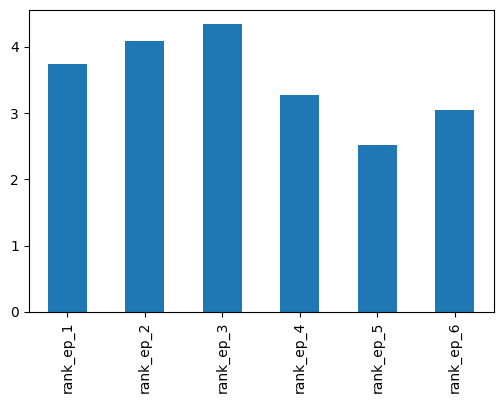

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

star_wars[star_wars.columns[9:15]].mean().plot.bar()

## Observations

Well, we have somehwat succeeded in our attempt to ~~prove that The Empire Strikes Back the best Star Wars film~~ clean this data set.

The first three episodes—episodes 4 through 6—are ranked higher than the second three episodes—episodes 1 through 3. Episode 3 has the lowest average rank, and Episode 5 has the highest average rank.

The first trilogy being ranked higher has to do with a combination of rose-colored glasses and actual better quality; people remember these movies as better than they actually are, but Episode 4 got the lowest ranking out of the 3, and it has much better writing and editing than Episode 6—rose colored glasses aren't the only factor. Episode 4 may have a great story, but the visuals simply don't hold up. Episode 6 has more haphazard writing but much improved visual effects.

Speaking of visuals, the second trilogy was a visual masterpiece. There was a lot of undue hate for the trilogy, probably due to reasons I'll mention in a bit, but they weren't actually that bad. From CGI to the immortal choreography of the Jedi show-downs, there is a lot to love about these films—not to mention one of the best outlines of a fall arc in narrative media; now THIS is good-character-writing-at-least-in-theory. The second trilogy *should* be revered as historic cinema. But the dialogue is awful, the unnecessary exposition is thick, and the actors clearly had trouble employing their skills when it came to the green screen (and the awful script, did I mention the awful dialogue in the very poorly written script?). The second trilogy is a grand project plagued by otherwise-artists who couldn't tell Legend George Lucas "No", whereas other strong artistic direction—that straightened out the man George Lucas—is what really polished his first trilogy into something deserving its ranking.

Speaking of—back to the original trilogy: Episode 5 is dark with a beautifully executed story. The reveal to Luke that Darth Vader is his father recontextualized the entirety of the first two films for first-time viewers, but it recontextualizes Luke's entire life every time we watch the movie; with strong character writing like that, it's hard to argue that this isn't objectively the best Star Wars film.

# Which Star Wars Films Are the Most Seen

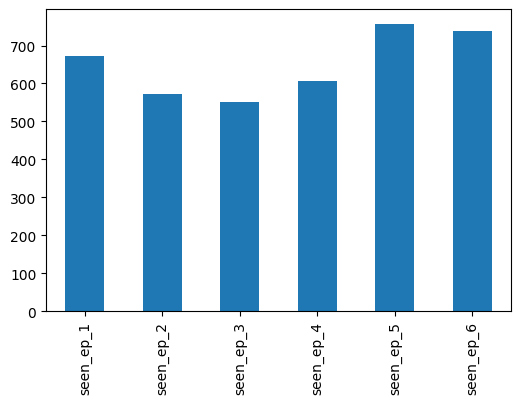

In [17]:
star_wars[star_wars.columns[3:9]].sum().plot.bar()

It's interesting that Episode 1 is more-seen than Episode 4

The rankings of episodes in order is: 5, 6, 4, 1, 2, 3
The viewcount of episodes in order is: 5, 6, 1, 4, 2, 3

So there is a very strong correlation! Perhaps the more popular episodes are liked because they were popular, or perhaps they are popular because of their quality. There's anecdotal evidence for both.

But there is one incongruity in the correlation to look at: More people saw episode 1 than 4, and 4 is ranked higher than 1.

When Starwars exploded in popularity, it wasn't when Episode 4 came out, but after Episode 4 came out. One possible explanation is that Episode 1 was riding the wave of popularity started by 4 and propogated by 5, but when high numbers of folk turned out to see episode 1 based on 5 and 6, they realized that maybe they didn't like Star Wars any more, for whatever reason.